# Sistemas simplificados

Uno podría notar que las ecuaciones de Navier-Stokes derivadas anteriormente son un complejos istema de ecuaciones diferenciales parciales no lineales acopladas. Esto no es algo que suene particularmente fácil de resolver! Por lo tanto, en CFD a menudo consideramos primero los sistemas simplificados de ecuaciones, descuidar o desacoplar algunos de los mecanismos físicos que están involucrados en el Navier-Ecuaciones de Stokes. Esto nos permite jugar con diferentes ideas de forma rápida y con relativa facilidad. Luego, una vez que entendamos cómo resolver diferentes partes de estas ecuaciones simplificadas, combinaremos estas ideas más adelante para resolver las ecuaciones de Navier-Stokes completas.

$$u(x,0) = e^{-40\left(x-\frac{1}{2}\right)^2}$$

## Advección lineal

In [1]:
#Modulos requeridos
import numpy as np
import matplotlib.pyplot as plt
import nbtools as nb

In [2]:
def advection_linear(a, L, n, dt, tf):
    # Construimos la grilla
    dx = L/n
    x = np.linspace(0, L - dx, n)

    # Solución inicial
    u = np.exp(-40*(x-1/2)**2)
    ut = np.zeros(u.shape)

    # Avance de la solución de tiempo
    t = 0
    while(t < tf):
        for i in range(n):
            # condicion de borde para función periodica
            if i == 0:
                ut[i] = u[i] - a*dt/dx*(u[i] - u[n - 1])
            else:
                ut[i] = u[i] - a*dt/dx*(u[i] - u[i - 1])

        u[:] = ut[:]
        t += dt

    plt.plot(x, u, 'o-', markersize=2, label=f'$t={tf}$')
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.legend()

Corremos ``advection_linear`` 
   - ``a``: Velocidad de advección, igual a ``1``,
   - ``L``: longitud de dominio igual a ``1``,
   - ``n``: Número de puntos en la grilla ``50``,
   - ``dt``: Paso de tiempo ``0.005``,
   - ``tf``: Tiempo final ``1``.

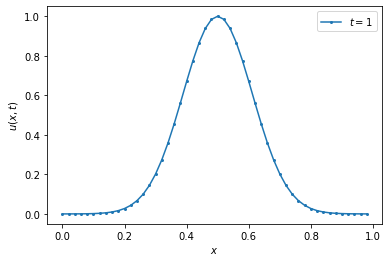

In [31]:
plt.figure(0)

# asignamos variables
a = 1
L = 1
n =  50
dt = 0.020
tf = 1


advection_linear(a, L, n, dt, tf)

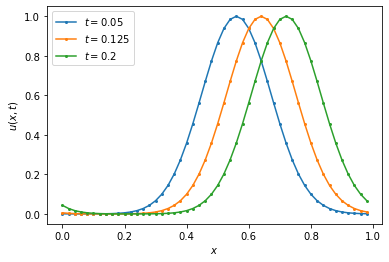

In [32]:
rango =  np.linspace(0.05, 0.2, 3, endpoint=True)

for tf in rango:
    advection_linear(a, L, n, dt, tf)

¿Qué comportamiento observas?

## Ecuación Burgers

In [9]:
def burgers(L, n, dt, tf):
    # Build grid
    dx = L/n
    x = np.linspace(0, L - dx, n)
    
    # Initialize solution
    u = np.exp(-40*(x-1/2)**2)
    ut = np.zeros(u.shape)

    # Advance solution in time
    t = 0
    while(t < tf):
        for i in range(n):
            # Enforce periodic boundary condition at x=0
            if i == 0:
                ut[i] = u[i] - 0.5*dt/dx * (u[i]**2-u[n-1]**2)
            else:
                ut[i] = u[i] - 0.5*dt/dx * (u[i]**2-u[i-1]**2)

        u[:] = ut[:]
        t += dt
        
    plt.plot(x, u, 'o-', markersize=2, label=f'$t={tf}$')
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.legend()

corremos ``burgers`` 
   - ``L``: longitud de dominio iagual a ``1``,
   - ``n``: Número de puntos en grilla igual a ``50``,
   - ``dt``: Paso de tiempo igual a ``0.005``,
   - ``tf``: Tiempo final ``0.5``.

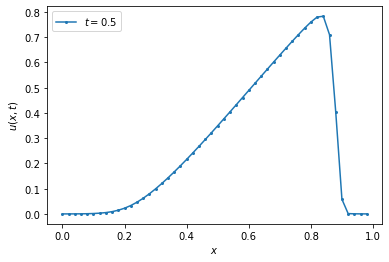

In [10]:
plt.figure(0)

# asignamos datos
L = 1
n = 50
dt = 0.005
tf = 0.5

burgers(L, n, dt, tf)

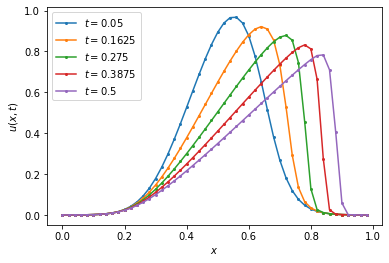

In [11]:
rango =  np.linspace(0.05, 0.5, 5, endpoint=True)

for tf in rango:
    burgers(L, n, dt, tf)

¿Qué comportamiento observas?

## Difusion lineal

In [13]:
def diffusion_linear(b, L, n, dt, tf):
    # construimos grilla
    dx = L/n
    x = np.linspace(0, L - dx, n)
    
    # Solución inicial
    u = np.exp(-40*(x - 1/2)**2)
    ut = np.zeros(u.shape)

    # avance solución de tiempo
    t = 0
    c = b*dt/dx**2
    while(t < tf):
        for i in range(n):
            if i == 0:
                # condición de frontera periodica x=0
                ut[i] = u[i] + c*(u[n - 1] - 2*u[i] + u[i + 1])
            elif i == n - 1:
                # condición de frontera periodica x=L
                ut[i] = u[i] + c*(u[i - 1] - 2*u[i] + u[0])
            else:
                ut[i] = u[i] + c*(u[i - 1] - 2*u[i] + u[i + 1])
        u[:] = ut[:]
        t += dt
    
    plt.plot(x, u, 'o-', markersize=2, label=f'$t={tf}$')
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.legend()

Ahora corramos``difussion_linear`` 
   - ``b``: Coeficiente de difusión igual a ``1e-2``,
   - ``L``: Longitud de dominio igual a ``1``,
   - ``n``: Numero de puntos de grilla igual a ``50``,
   - ``dt``: Paso de tiempo igual a ``0.001``,
   - ``tf``: Paso final de tiempo ``5``.

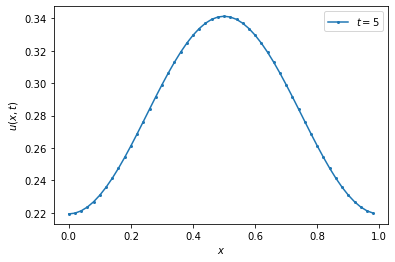

In [14]:
plt.figure(0)

# asignamos las variables
b = 1e-2
L = 1
n = 50
dt = 0.001
tf = 5

diffusion_linear(b, L, n, dt, tf)

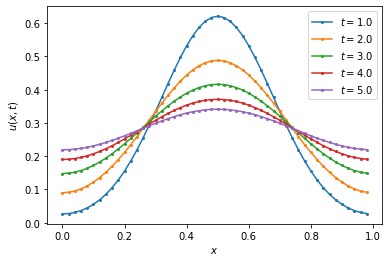

In [15]:
rango =  np.linspace(1, 5, 5, endpoint=True)

for tf in rango:
    diffusion_linear(b, L, n, dt, tf)

¿Qué comportamiento observas?